In [13]:
from multiplicative_weights_sim import Distribution, generate_agents, sim, Agent, Tolerance
from generate_opinions import *
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import random
from pickle_utils import save_agents

In [14]:
num_agents = 1000

saved_opinions = pd.read_csv('constants/opinions.csv', index_col=0)
opinions = saved_opinions['0'].to_list()

# Creating agents with different distributions of opinions
all_agents = []
for percent_low in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
    num_extra_low = int(num_agents*percent_low)
    num_same = int(num_agents*(1-percent_low)/2)
    num_high = num_agents - num_extra_low - num_same

    weights = []

    for i in range(0, num_extra_low):
        weights.append(np.array([8, 1, 1]))

    for i in range(0, num_same):
        weights.append(np.array([1, 1, 1]))

    for i in range(0, num_high):
        weights.append(np.array([1, 1, 8]))

    random.shuffle(weights)
    agents = generate_agents(opinions, weights)
    all_agents.append((percent_low, agents))

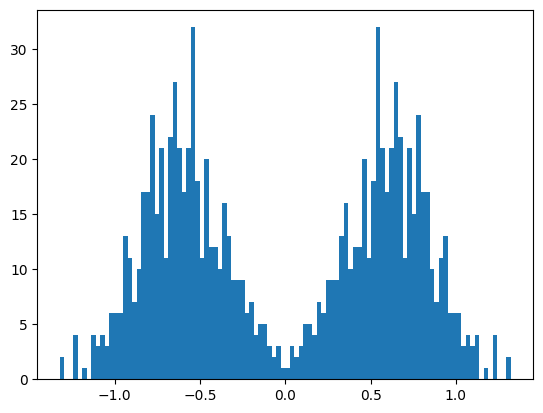

In [15]:
plt.hist(opinions, bins=100)
plt.show()

In [16]:
all_agents_post_sim = []
for percent_low, agents in all_agents:
    print(f"simulating low preference percent {percent_low}")
    num_iterations = 1000
    learning_rate = 0.1
    all_agents_post_sim.append((percent_low, sim(agents, num_iterations, learning_rate)))

simulating low preference percent 0.9
iterations: 0 - 100 took 17.179112911224365 seconds
iterations: 100 - 200 took 16.43026614189148 seconds
iterations: 200 - 300 took 17.688273191452026 seconds
iterations: 300 - 400 took 17.47751021385193 seconds
iterations: 400 - 500 took 16.01121425628662 seconds
iterations: 500 - 600 took 18.65367102622986 seconds
iterations: 600 - 700 took 18.825345039367676 seconds
iterations: 700 - 800 took 19.16001296043396 seconds
iterations: 800 - 900 took 17.32984495162964 seconds
total sim time: 177.0339639186859
simulating low preference percent 0.8
iterations: 0 - 100 took 17.358619213104248 seconds
iterations: 100 - 200 took 17.482038021087646 seconds
iterations: 200 - 300 took 17.02517795562744 seconds
iterations: 300 - 400 took 16.440105199813843 seconds


In [ ]:
for percent_low, agents in all_agents_post_sim:
    save_agents(agents, f"agents_{percent_low}.pkl")